# Read & clean the gaia (r = 3.5) sample

In [1]:
# For Sky Plots se: http://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from astropy.table import Table, join, vstack, hstack, Column, MaskedColumn, unique
from astropy import coordinates, units as u, wcs
import warnings
from astropy.utils.exceptions import AstropyWarning

import os, glob, getpass, sys
user = getpass.getuser()
sys.path.append('/Users/' + user + '/Dropbox/my_python_packages')
from gaia.Basic import Basic
from gaia.Basic_Plotters import Basic_Plotters
from gaia.cluster_comparison import Comparison as Comparison

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
# Read data ====================================
warnings.simplefilter('ignore', AstropyWarning)
path     = '/Users/hcanovas/Astrofisica/papers/2019_clustering_oph_final/'

control = Basic()
control.read_gaia_cat(path + 'sample_control/OPH___control_sample.vot', label = 'Control')
control.get_pm_mod()

gaia = Basic()
gaia.read_gaia_cat(path + 'sample_gaia/sample_oph_cone_r3.5-result.vot', label = 'Gaia')
gaia.get_len()
gaia.remove_duplicates()
gaia.get_len()


# Compute Quality control-Cols =================
gaia.get_BPRP2()
gaia.get_len()
gaia.get_unit_weight_error()
gaia.get_len()
gaia.get_umax_criteria()
gaia.get_ruwe_0()
gaia.get_len()
print()

Targets in Catalogue:  2814
Targets after source_id duplicate removal:       2814
Targets in Catalogue:  2814
Targets in Catalogue:  2814
Targets in Catalogue:  2814
Loading Gaia DR2 RUWE table (see Lindengren 2018 at https://www.cosmos.esa.int/web/gaia/dr2-known-issues)
Targets in Catalogue:  2698



In [3]:
# Apply 1st quality-control ====================
gaia.apply_criteria_visper(minvis=7)
gaia.get_len()

# Apply 2nd quality-control ====================
gaia.apply_criteria_ruwe()
gaia.get_len()

Targets in Catalogue:  2691
Targets in Catalogue:  2300


In [4]:
# Add extra cols for later use =================
gaia.get_distance()     # Compute Distance
gaia.compute_absmag()   # Compute Absolute Magnitudes
gaia.get_pm_mod()       # Compute Proper Motion Modulus
gaia.get_vrad()         # Compute Radial velocities
gaia.compute_3D()       # Compute Cartesian Coordinates
gaia.compute_mag_errs() # Compute Magnitude Errors

Targets with vrad: 236.0
% of observations:  10.3%
vrad =              -6.9 +/- 31.8 [km.s**-1]


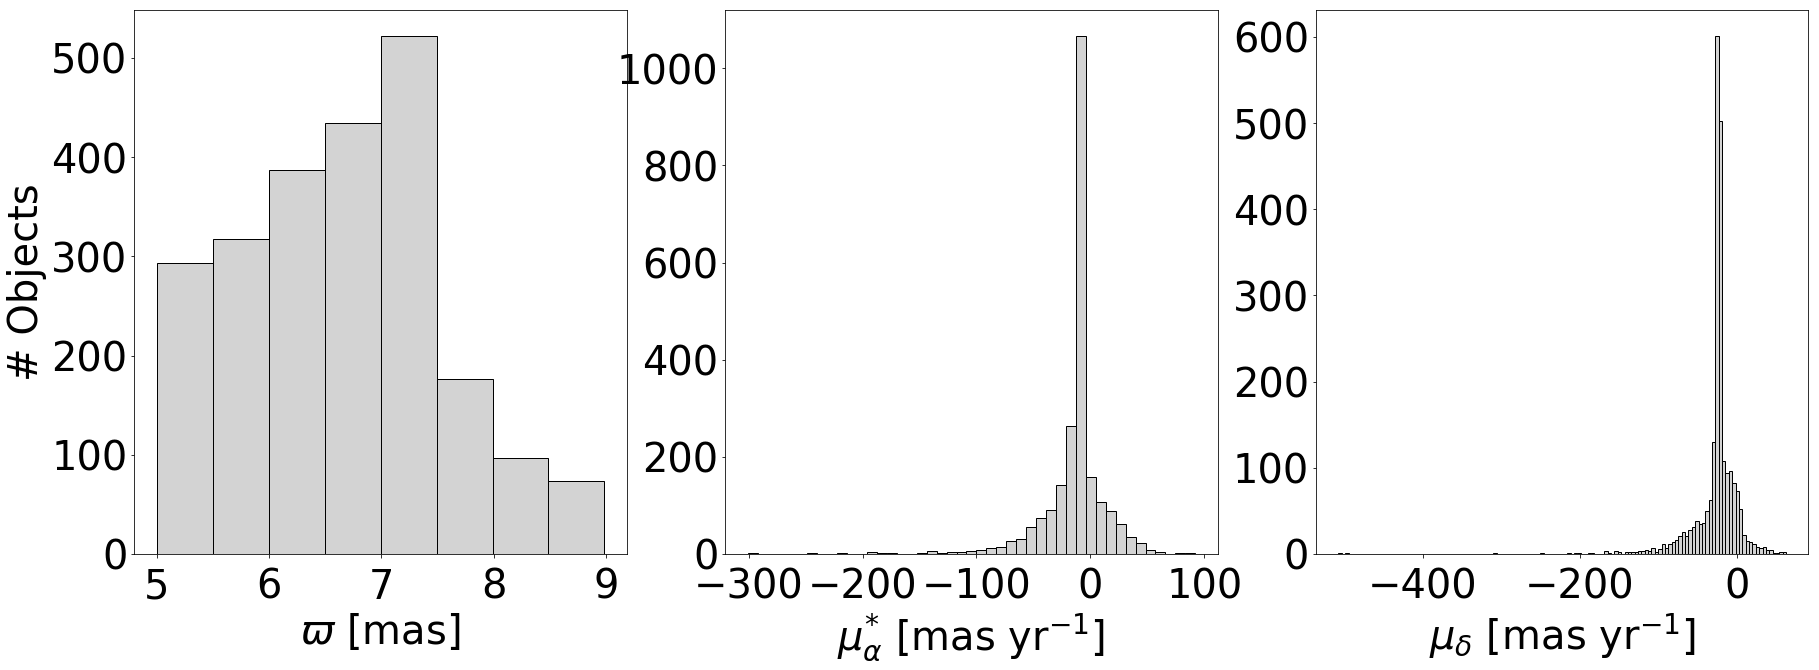


Gaia Cleaned Sample saved as:  gaia_sample_cleaned.vot



In [5]:
# Compute astrometric histograms ===============
figures = Basic_Plotters(gaia.cat)
hists_1 = figures.plot_3_hist(fig_nm = '01_read_gaia_cone_0.pdf', x1_bins=7, x2_bins=5, x3_bins=5, ftsize = 40, ylabel_1= '# Objects')

# Save Data ========================
name = 'gaia_sample_cleaned.vot'
print()
print('Gaia Cleaned Sample saved as: ', name)
print()
gaia.cat.write(name, format = 'votable', overwrite = True)

## Compare the Gaia & Control samples 

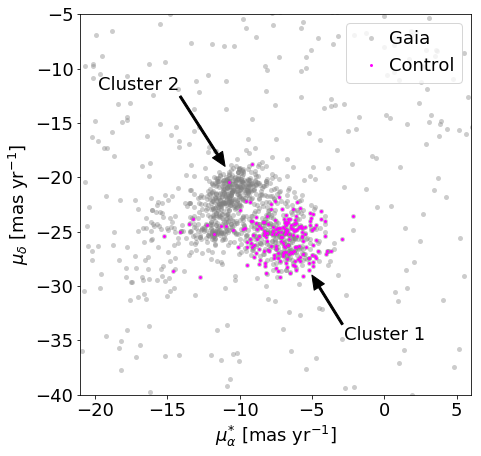

In [6]:
# Create different images ======================
comp_2 = Comparison()
comp_2.load_clusters(inp_1=gaia.cat, inp_2=control.cat)

fig     = plt.figure(figsize=[7,7])
figname = '01_read_gaia_cone_1.pdf'

comp_2.plot_2d(show_1=True, xlim=[-21,6], ylim=[-40,-5],
               ftsize=18, markersize_1=5, markersize_2=3, alpha_1=0.4, alpha_2=1.0, show_2=True, color = 'grey', color_2 = 'magenta')

arrowprops = {'facecolor':'black', 'width':2, 'headwidth':12, 'headlength':14}
plt.annotate('Cluster 2', xy = (-11,-19), xytext = (-17,-12),arrowprops = arrowprops, fontsize = 18, ha="center")
plt.annotate('Cluster 1', xy = (-5,-29),  xytext = (0,  -35),arrowprops = arrowprops, fontsize = 18, ha="center")

plt.show()
fig.savefig(figname, bbox_inches = 'tight', overwrite = True)    

In [7]:
# Look at typical Errors ===========
delta_r = gaia.cat['pmra_error'].mean()
delta_d = gaia.cat['pmdec_error'].mean()

print(f'Average Error on PMRA: {delta_r:12.2f}')
print(f'Average Error on PMDEC: {delta_d:11.2f}')

Average Error on PMRA:         0.35
Average Error on PMDEC:        0.23


In [8]:
# Sanity Check ====================
sample_control = Table.read(path + 'sample_control/OPH___control_sample.vot')

cols = ['ra', 'dec', 'source_id']
st   = join(sample_control[cols], gaia.cat[cols])

if len(st[st['source_id'].mask == False]) == len(sample_control):
    print('ALL MEMBERS FROM THE CONTROL SAMPLE ARE INCLUDED IN THE GAIA SAMPLE')

ALL MEMBERS FROM THE CONTROL SAMPLE ARE INCLUDED IN THE GAIA SAMPLE
